# Prepare

- Common Time Series Data Prep
    - set date types
    - resample to a uniform time period
    - check for missing dates
    - handle missing values
- What is an observation?
- Prep as pre-exploration exploration -- What does our data mean? What does it represent?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ts_acquire import get_store_data

In [2]:
df = get_store_data()
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


## Summarization

- stores, items, sales, sales_date, sale_amount, item_price

In [3]:
df.shape

(913000, 14)

In [5]:
df.store_id.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store_id, dtype: int64

In [6]:
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [7]:
df.sale_id

0              1
1              2
2              3
3              4
4              5
           ...  
912995    912996
912996    912997
912997    912998
912998    912999
912999    913000
Name: sale_id, Length: 913000, dtype: int64

In [10]:
df.dtypes

sale_amount      float64
sale_date         object
sale_id            int64
store_address     object
store_city        object
store_id           int64
store_state       object
store_zipcode      int64
item_brand        object
item_id            int64
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
dtype: object

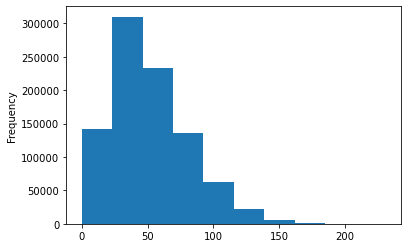

In [9]:
df.sale_amount.plot.hist()

`sale_id` uniquely identifies a row -- one row is one sale

In [13]:
df.sale_date.head()

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
2    Thu, 03 Jan 2013 00:00:00 GMT
3    Fri, 04 Jan 2013 00:00:00 GMT
4    Sat, 05 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [22]:
from time import strftime

strftime('%a, %d, %b %Y %H:%M:%S %Z')

'Tue, 27, Oct 2020 14:03:47 CDT'

In [25]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [26]:
df.dtypes

sale_amount                  float64
sale_date        datetime64[ns, GMT]
sale_id                        int64
store_address                 object
store_city                    object
store_id                       int64
store_state                   object
store_zipcode                  int64
item_brand                    object
item_id                        int64
item_name                     object
item_price                   float64
item_upc12                     int64
item_upc14                     int64
dtype: object

## Defining an Observation

- What does one row represent?
- What assumptions are we making?
- How can we check those assumptions?

Sanity checking

One observation == 1 sale == 1 store + 1 item + 1 date

1 sale_id uniquely identifies one row 

- a store id does not uniquely identify a row
- an item id does not uniquely identify a row
- a date does not uniquely identify a row

In [27]:
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,2013-01-02 00:00:00+00:00,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,2013-01-03 00:00:00+00:00,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,2013-01-04 00:00:00+00:00,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,2013-01-05 00:00:00+00:00,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


Is each item/store equally represented?

In [28]:
df.store_id.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store_id, dtype: int64

In [32]:
df.item_id.value_counts().describe()

count       50.0
mean     18260.0
std          0.0
min      18260.0
25%      18260.0
50%      18260.0
75%      18260.0
max      18260.0
Name: item_id, dtype: float64

There's 913,000 rows in our dataset

In [38]:
18260 * 50

913000

In [34]:
df.groupby(['store_id', 'item_id']).size().describe()

count     500.0
mean     1826.0
std         0.0
min      1826.0
25%      1826.0
50%      1826.0
75%      1826.0
max      1826.0
dtype: float64

In [37]:
df.sale_date.dt.date.value_counts()

2016-02-22    500
2015-04-19    500
2017-12-27    500
2014-04-13    500
2013-07-09    500
             ... 
2013-05-18    500
2016-08-07    500
2017-02-08    500
2015-10-28    500
2015-11-21    500
Name: sale_date, Length: 1826, dtype: int64

Every combination of store and item has the same number of data points.

Is each date equally represented? yes

Is the first sale date for each store/item the same, and is the last sale date for each store/item the same?

In [40]:
# For each store and item combination, what is the first sale date?
df.groupby(['store_id', 'item_id']).sale_date.min().nunique()

1

If there's 1 unique first sale date, then all the store/item combos share the same first sale date.

In [41]:
# For each store and item combination, what is the last sale date?
df.groupby(['store_id', 'item_id']).sale_date.max().nunique()

1

In [42]:
df.sale_date.min(), df.sale_date.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='GMT'),
 Timestamp('2017-12-31 00:00:00+0000', tz='GMT'))

Are there any missing days?

Date max - date min + 1 is the number of unique days.

So if nunique days == the above, we're happy each day is represented.

In [46]:
df.sale_date.max() - df.sale_date.min() + pd.Timedelta('1d')

Timedelta('1826 days 00:00:00')

In [47]:
df.sale_date.dt.date.nunique()

1826

In [49]:
df.isna().sum()

sale_amount      0
sale_date        0
sale_id          0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
dtype: int64

## What is an observation?

- a sale, i.e. the combination of store, item, and date

What should an observation be?

- one store: is the volume of items by store changing over time?
- one item: do some sell better than others?
- one date: Is there seasonality in our data?

If one observation is one date, how do we aggregate?

- sum of the sale amount -- total items sold across all stores
- avg of the sale amount -- average # of items sold
- item price -- multiply sale amount by item price to get total sales and then sum this to get daily revenue

sale amount == quantity sold

In [52]:
total_sales = df.set_index('sale_date').resample('D').sale_amount.sum()
total_sales.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
2013-01-04 00:00:00+00:00    15677.0
2013-01-05 00:00:00+00:00    16237.0
Freq: D, Name: sale_amount, dtype: float64

In [53]:
avg_daily_sales = df.set_index('sale_date').resample('D').sale_amount.mean()
avg_daily_sales.head()

sale_date
2013-01-01 00:00:00+00:00    27.392
2013-01-02 00:00:00+00:00    27.356
2013-01-03 00:00:00+00:00    28.976
2013-01-04 00:00:00+00:00    31.354
2013-01-05 00:00:00+00:00    32.474
Freq: D, Name: sale_amount, dtype: float64